<a href="https://colab.research.google.com/github/Blvisse/DataScience/blob/master/CoronaVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install sweetviz

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz
from google.colab import files
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [46]:
files.upload()

Saving world-health-organization-who-situation-reports.csv to world-health-organization-who-situation-reports (1).csv


{'world-health-organization-who-situation-reports.csv': b"date,location,new_cases,new_deaths,total_cases,total_deaths\n2020-02-25,Afghanistan,,,1,\n2020-02-26,Afghanistan,0,,1,\n2020-02-27,Afghanistan,0,,1,\n2020-02-28,Afghanistan,0,,1,\n2020-02-29,Afghanistan,0,,1,\n2020-03-01,Afghanistan,0,,1,\n2020-03-02,Afghanistan,0,,1,\n2020-03-03,Afghanistan,0,,1,\n2020-03-04,Afghanistan,0,,1,\n2020-03-05,Afghanistan,0,,1,\n2020-03-06,Afghanistan,0,,1,\n2020-03-07,Afghanistan,0,,1,\n2020-03-08,Afghanistan,3,,4,\n2020-03-09,Afghanistan,0,,4,\n2020-03-10,Afghanistan,0,,4,\n2020-03-11,Afghanistan,0,,4,\n2020-03-12,Afghanistan,3,,7,\n2020-03-13,Afghanistan,0,,7,\n2020-03-14,Afghanistan,0,,7,\n2020-03-15,Afghanistan,3,,10,\n2020-03-16,Afghanistan,6,,16,\n2020-03-17,Afghanistan,5,,21,\n2020-03-09,Albania,,,2,\n2020-03-10,Albania,0,,2,\n2020-03-11,Albania,8,,10,\n2020-03-12,Albania,0,,10,\n2020-03-13,Albania,13,,23,\n2020-03-14,Albania,10,,33,1\n2020-03-15,Albania,5,0,38,1\n2020-03-16,Albania,4,0,42,1\

In [47]:
data=pd.read_csv('world-health-organization-who-situation-reports.csv',index_col='date', parse_dates=True)

In [48]:
data.head()

,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2020-02-25,Afghanistan,NaN,NaN,1,NaN
2020-02-26,Afghanistan,0.0,NaN,1,NaN
2020-02-27,Afghanistan,0.0,NaN,1,NaN
2020-02-28,Afghanistan,0.0,NaN,1,NaN
2020-02-29,Afghanistan,0.0,NaN,1,NaN


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2867 entries, 2020-02-25 to 2020-03-17
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      2867 non-null   object 
 1   new_cases     2707 non-null   float64
 2   new_deaths    540 non-null    float64
 3   total_cases   2867 non-null   int64  
 4   total_deaths  587 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 134.4+ KB


In [50]:
report=sweetviz.analyze([data,'Data'],target_feat='total_deaths')

:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [51]:
report.show_html('CovidReport.html')

# Let's Plot the Numerical Columns

In [52]:
numericalCols=[cnames for cnames in data.columns if
               data[cnames].dtype in ['float64', 'int64']]

In [53]:
numericalCols

['new_cases', 'new_deaths', 'total_cases', 'total_deaths']

In [54]:
numericalTransformer= SimpleImputer(missing_values=np.nan,strategy='constant', fill_value=0)

In [55]:
preProcessing= ColumnTransformer(transformers=[('numerical',numericalTransformer,numericalCols)])

In [56]:
numericalData=preProcessing.fit_transform(data)

In [57]:
numericalData=pd.DataFrame(data=numericalData,columns=numericalCols,index=None)

In [58]:
numericalData

,new_cases,new_deaths,total_cases,total_deaths
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
2862,7488.0,338.0,132758.0,4956.0
2863,9761.0,433.0,142534.0,5392.0
2864,10967.0,343.0,153517.0,5735.0
2865,13971.0,855.0,167506.0,6606.0


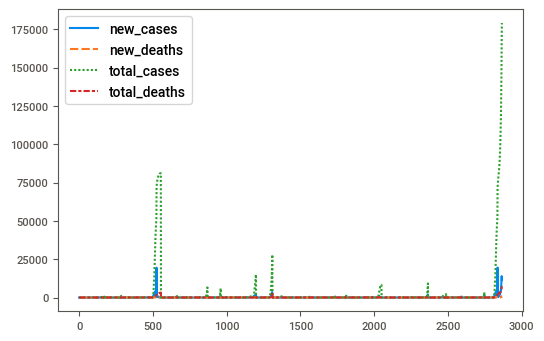

In [59]:
sns.lineplot(data=numericalData)

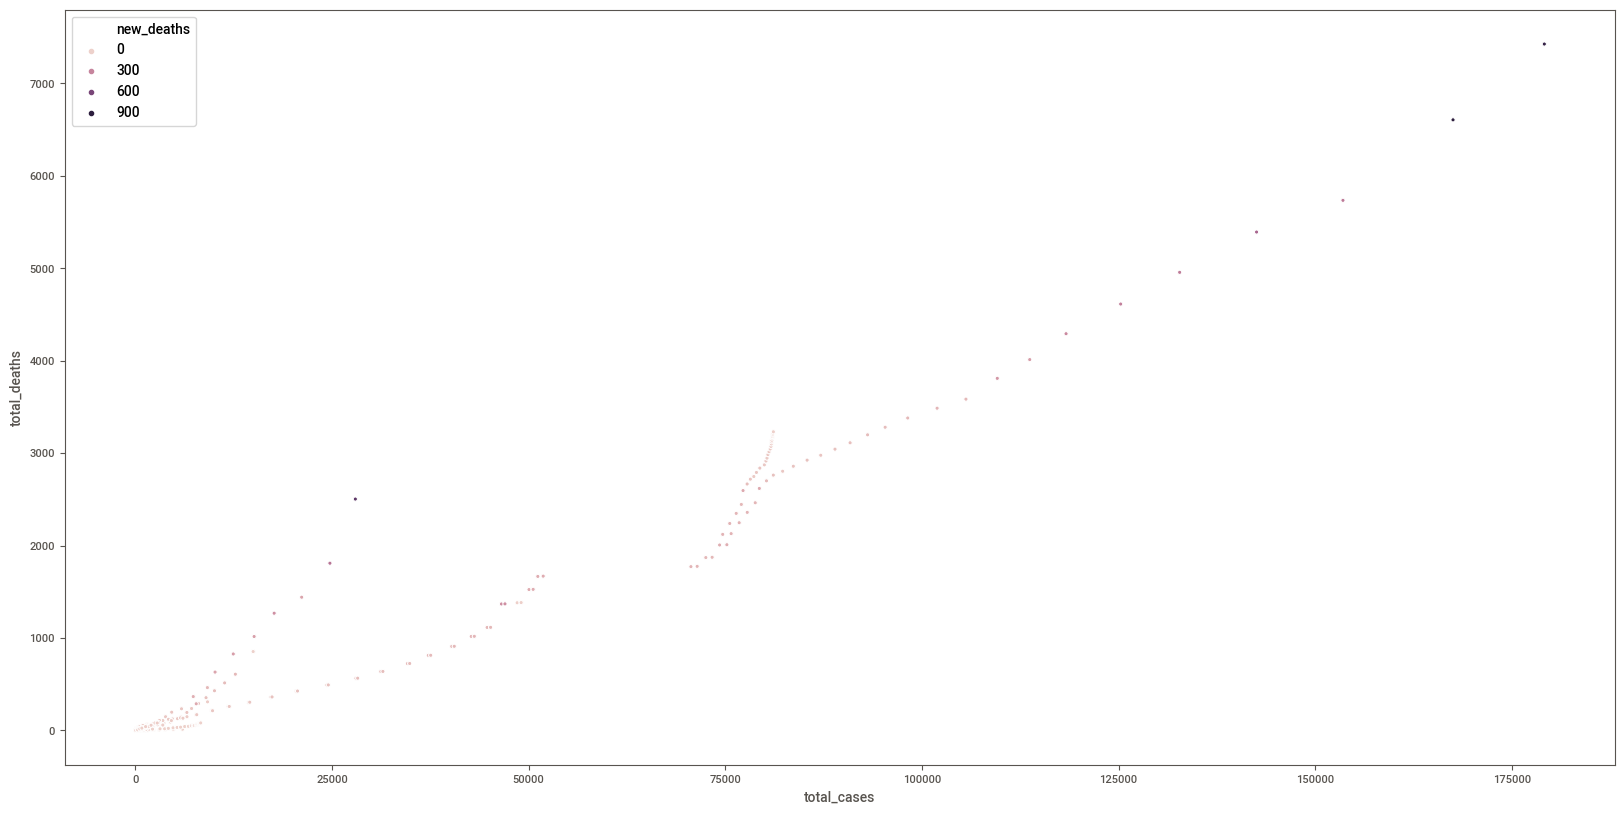

In [60]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=numericalData['total_cases'],y=numericalData['total_deaths'], hue=numericalData['new_deaths'])

KeyboardInterrupt: ignored

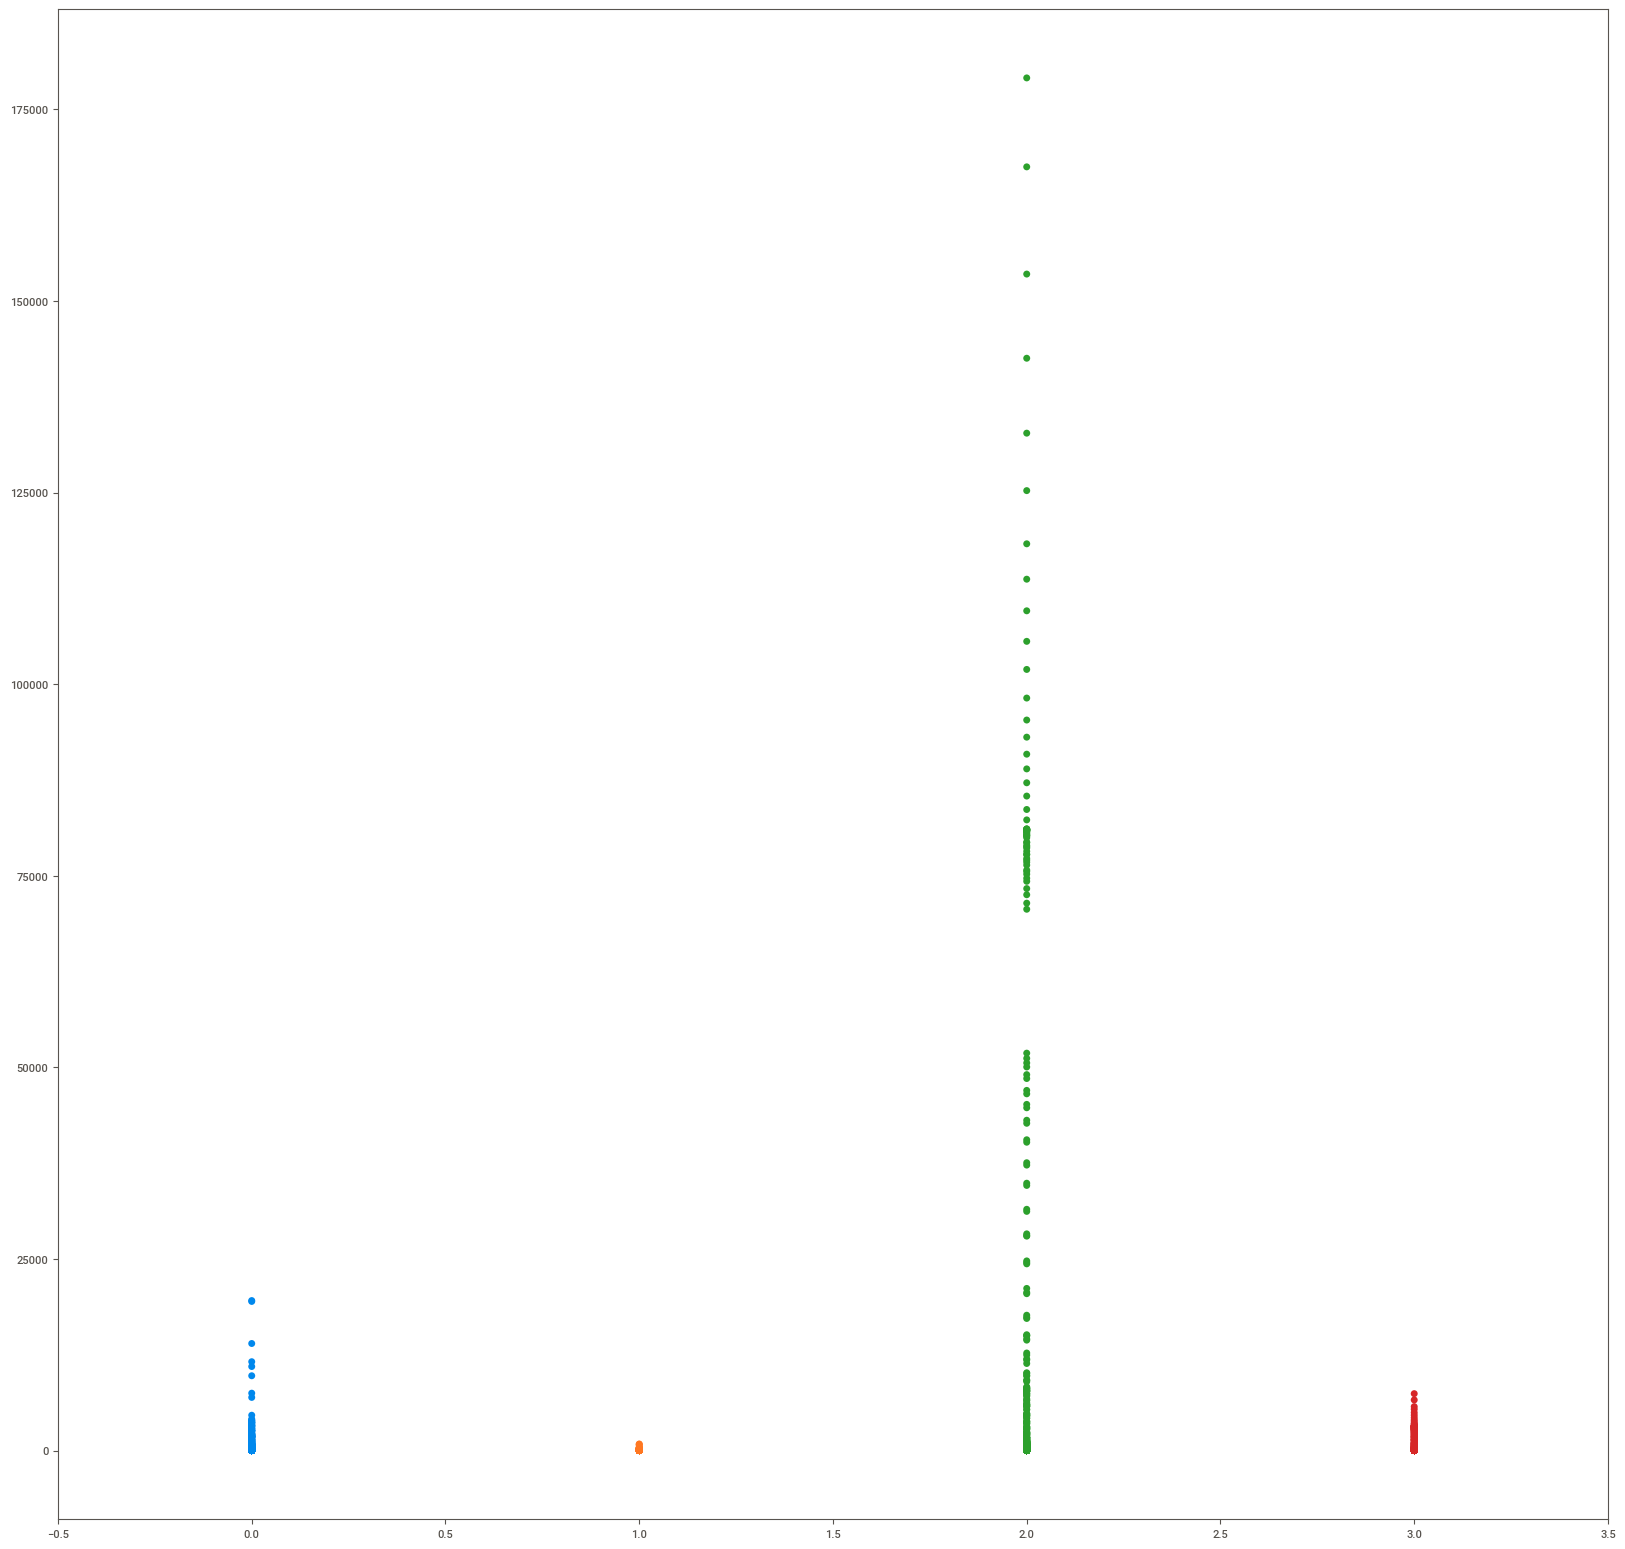

In [19]:
plt.figure(figsize=(20,20))
sns.swarmplot(data=data)
plt.xlabel(labelpad=5)

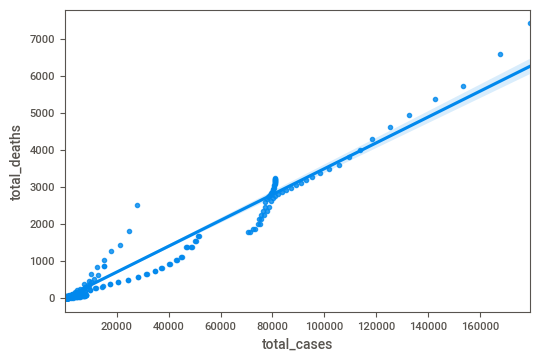

In [61]:
sns.regplot(data=numericalData, x='total_cases', y='total_deaths',)




---


Total deaths per location





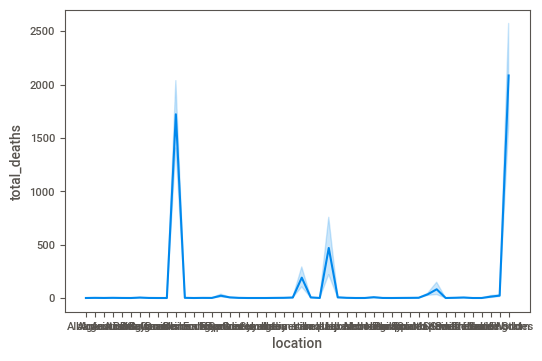

In [62]:
sns.lineplot(data=data,x=data['location'],y='total_deaths')



---
We check to see the number of new deaths per day


Text(0.5, 1.0, 'New deaths per day')

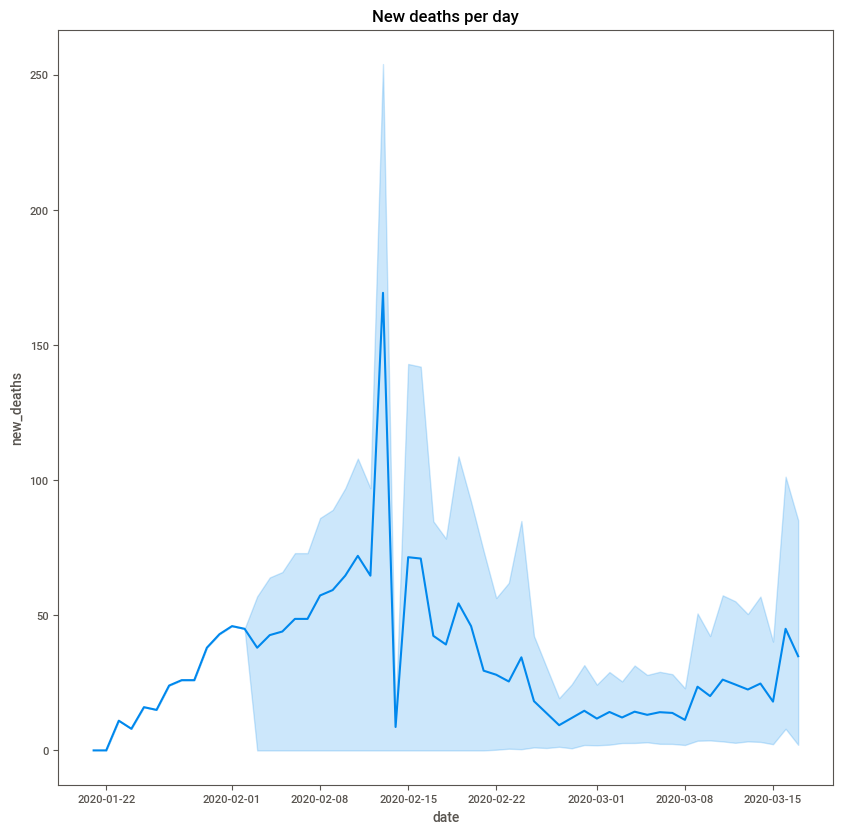

In [63]:
plt.figure(figsize=(10,10))
sns.lineplot(x=data.index, y=data['new_deaths'])
plt.title('New deaths per day')

Text(0.5, 1.0, 'Total deaths per day')

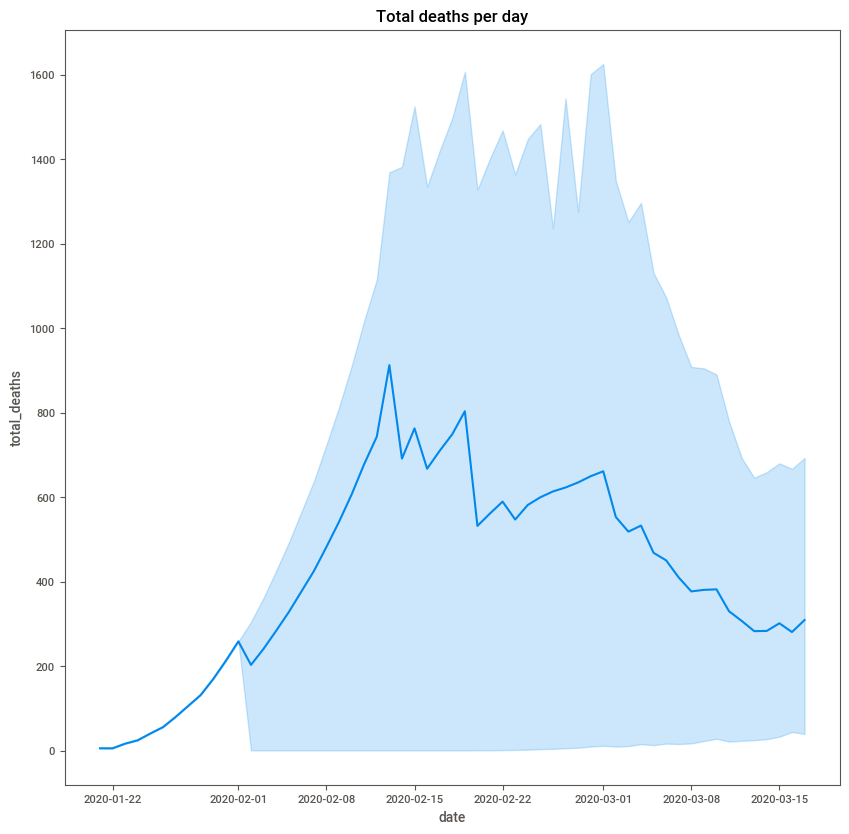

In [64]:
plt.figure(figsize=(10,10))
sns.lineplot(x=data.index, y=data['total_deaths'])
plt.title('Total deaths per day')

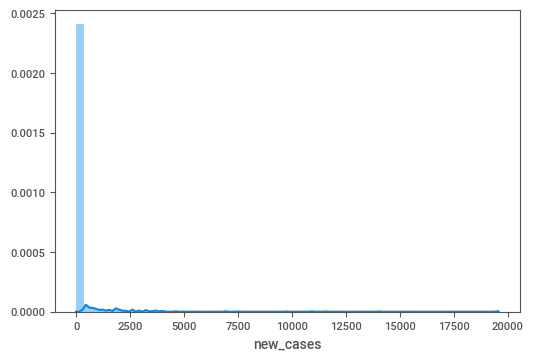

In [75]:
sns.distplot(a=data['new_cases'])